# 4 Training and Modeling Data<a id='4_Training_and_Modeling_Data'></a>

## Contents <a id ="Content" > </a>

* [Introduction](#Introduction)
* [Imports](#Imports)
* [Train Test Split](#Train_Test_Split) 
* [Training and Modeling](#Training_and_Modeling)
    * [Model Selection](#Model_Selection)
    * [Evaluation Metrics](#Evaluation-Metrics)
        * [Training and Modeling](#Train_and_Model)
        * [Hyperparameter Tuning and Model Training](#Hyperparameter_Tuning_Training)
            * [Logistic Regression](#Logistic_Regression)
            * [Evaluation](#Evaluation)
* [Additional Models](#AdditionalModels)
* [Summary](#Summary)
* [Recommendations](#Recom)

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import pipeline
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neighbors
from xgboost import XGBClassifier

#from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
import matplotlib.pyplot as plt

# remove warning
#import warnings
#warnings.filterwarnings("ignore")


In [2]:
X_train = pd.read_csv("../data/4.X_train.csv")
y_train = pd.read_csv("../data/4.y_train.csv")
X_test = pd.read_csv("../data/4.X_test.csv")
y_test = pd.read_csv("../data/4.y_test.csv")

In [3]:
X_train.shape,y_train.shape

((7088, 16), (7088, 1))

In [4]:
X_test.shape,y_test.shape

((3039, 16), (3039, 1))

In [5]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7088.0,-3.454018e-16,1.000071,-2.531322,-0.661337,-0.038008,0.709986,3.327966
Credit_Limit,7088.0,8.597793e+00,0.930669,7.271217,7.841395,8.418587,9.298671,10.449178
Total_Revolving_Bal,7088.0,9.103482e-01,0.638103,0.000000,0.248822,1.000000,1.396112,1.977219
Total_Trans_Amt,7088.0,8.167921e+00,0.656979,6.390241,7.674617,8.267449,8.468633,9.824661
Avg_Utilization_Ratio,7088.0,2.753070e-01,0.276635,0.000000,0.023000,0.175000,0.502000,0.999000
Gender_Encoded,7088.0,5.328725e-01,0.498953,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,7088.0,2.344949e+00,1.299597,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,7088.0,2.839306e+00,1.215114,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,7088.0,2.175226e+00,1.334986,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,7088.0,1.081546e+00,0.330233,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,3039.0,1.760867e-16,1.000165,-2.545475,-0.671517,-0.046864,0.702719,2.701607
Credit_Limit,3039.0,8.616519e+00,0.940983,7.271217,7.854381,8.432724,9.328701,10.449178
Total_Revolving_Bal,3039.0,9.134881e-01,0.640117,0.000000,0.349961,1.000000,1.401403,1.961808
Total_Trans_Amt,3039.0,8.157574e+00,0.648578,6.234411,7.682021,8.271293,8.453401,9.797849
Avg_Utilization_Ratio,3039.0,2.739293e-01,0.273522,0.000000,0.022500,0.177000,0.503500,0.994000
Gender_Encoded,3039.0,5.202369e-01,0.499673,0.000000,0.000000,1.000000,1.000000,1.000000
Dependent_count,3039.0,2.349128e+00,1.297511,0.000000,1.000000,2.000000,3.000000,5.000000
Education_Level_sorted,3039.0,2.851925e+00,1.201185,1.000000,2.000000,3.000000,3.000000,6.000000
Income_Category_sorted,3039.0,2.199079e+00,1.332057,1.000000,1.000000,2.000000,3.000000,5.000000
Card_Category_sorted,3039.0,1.088516e+00,0.341929,1.000000,1.000000,1.000000,1.000000,4.000000


## Training and Modeling <a id=Training_and_Modeling ></a>

### Fit Model on Intercept (naive model)

In [7]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()

In [8]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

In [9]:
def threshhold_and_plot(y_test,target,n_points=50,plot=True):
    probs = np.linspace(0,1,n_points)
    def make_thresh(): 
        precision = [metrics.precision_score(y_test,np.where(target > thresh,1,0),zero_division=1) for thresh in probs]
        recall = [metrics.recall_score(y_test,np.where(target > thresh,1,0),labels=np.unique(target),zero_division=1) for thresh in probs]
        f1 = [metrics.f1_score(y_test,np.where(target > thresh,1,0),labels=np.unique(target),zero_division=1) for thresh in probs]
        return precision,recall,f1

    precision,recall,f1 = make_thresh()
    if plot:
        plt.plot(probs,precision,label='precision')
        plt.plot(probs,recall,label='recall')
        plt.plot(probs,f1,label='f1')
        plt.title("Metrics at different threshold")
        plt.xlabel("Probability")
        plt.legend()
        return precision,recall,f1
    else:
        return precision,recall,f1
    
def max_thresh(score_vec):
    max_idx=np.argmax(score_vec)
    max_score=score_vec[max_idx]
    return max_idx,max_score

In [10]:
#plot roc
def plot_roc(actuals,preds):
    fpr, tpr, thresholds = metrics.roc_curve(actuals, preds)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.show()
    return 

In [11]:
def make_confusion_matrix_ROC(y_actual,y_predict,title,score=False,y_class_report=False,ROC_AUC=False):
    
    #confusion_matrix
    fig, ax = plt.subplots(1, 1)
    Con_Mtx = metrics.confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=Con_Mtx,display_labels=["No","Yes"])
    disp.plot(cmap='Blues',ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
    
    #Scores
    if score:
        #print("accuracy_score : {0}\n".format(metrics.accuracy_score(y_actual,y_predict)))
        Con_Mtx = metrics.confusion_matrix(y_actual,y_predict, labels=[0,1]).ravel()
        print("True -ve : {0}\nFalse +ve : {1}\nFalse -ve : {2}\nTrue +ve : {3}\n".format(Con_Mtx[0],Con_Mtx[1],Con_Mtx[2],Con_Mtx[3]))

    
    #classification_report
    if y_class_report:
        y_class_report = metrics.classification_report(y_actual, y_predict, target_names=["not 1", "1"])
        print("classification report\n", y_class_report )
    
    #ROC_AUC Curve
    if ROC_AUC:
        print("ROC_AUC Curve")
        plot_roc(y_actual,y_predict)
    

In [12]:
threshhold_and_plot_score = pd.DataFrame(index=['Base Model',
                                                'Logistic' ,
                                                'RandomForest',
                                                'KNeighbors',
                                                'XGBClassifier'],
                                         columns =['precision','recall','f1','accuracy'])

In [13]:
null_reg = linear_model.LogisticRegression(fit_intercept= False,max_iter=500,random_state=632966)

In [14]:
X_train_null = np.ones(shape=X_train.shape[0]).reshape(-1,1)
X_test_null = np.ones(shape=y_test.shape[0]).reshape(-1,1)

In [15]:
#fit on train and test data no tuning
null_train = null_reg.fit(X=X_train_null,y=y_train)
null_test = null_reg.fit(X=X_test_null,y=y_test)

In [16]:
#predict_proba and pred_prob returns two columns, second one is target
train_pred = null_train.predict_proba(X_train_null)
test_pred = null_test.predict_proba(X_test_null)

In [17]:
#base metrics precision: minmum performance 
metrics.precision_score(y_true= y_train,y_pred= np.where(train_pred[:,1]>0.5,1,0),zero_division=1)

1.0

In [18]:
#base metrics recall: minmum performance
metrics.recall_score(y_true= y_train,y_pred= np.where(train_pred[:,1]>0.5,1,0),zero_division=1)

0.0

In [19]:
#base metrics f1 score: minmum performance
metrics.f1_score(y_true= y_train,y_pred= np.where(train_pred[:,1]>0.5,1,0),zero_division=1)

0.0

In [20]:
#check to see if close to population value
print("Observed mean: {:.3f}, Fit: {:.3f}".format(y_train.mean(),train_pred[:,1].mean()))

Observed mean: 0.161, Fit: 0.161


In [21]:
#On test data

In [22]:
#base metrics precision: minmum performance 
metrics.precision_score(y_true= y_test,y_pred= np.where(test_pred[:,1]>0.5,1,0),zero_division=1)

1.0

In [23]:
#base metrics recall: minmum performance
metrics.recall_score(y_true= y_test,y_pred= np.where(test_pred[:,1]>0.5,1,0),zero_division=1)

0.0

In [24]:
#base metrics f1 score: minmum performance
metrics.f1_score(y_true= y_test,y_pred= np.where(test_pred[:,1]>0.5,1,0),zero_division=1)

0.0

In [25]:
#check to see if close to population value
print("Observed mean: {:.3f}, Fit: {:.3f}".format(y_test.mean(),test_pred[:,1].mean()))

Observed mean: 0.161, Fit: 0.161


Worked well for test data as well.Observed mean and Fit Mean are same, class distrbution is good, meaning data is normally distributed. And here is the ROC_AUC curve

ROC_AUC Curve for train data


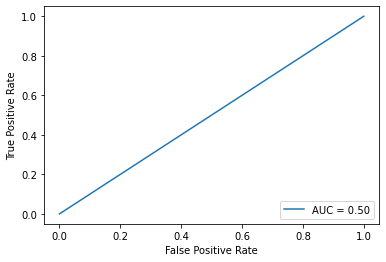

In [26]:
print("ROC_AUC Curve for train data")
plot_roc(y_train,train_pred[:,1])

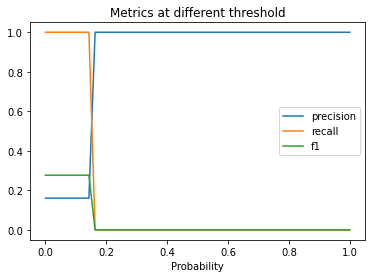

In [27]:
_,_,_ = threshhold_and_plot(y_test=y_train, target=train_pred[:,1],n_points=50, plot=True)

ROC_AUC Curve for test


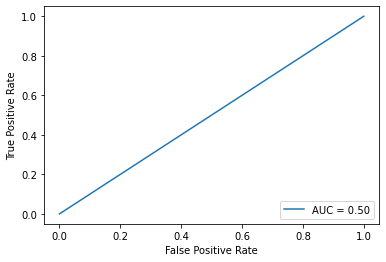

In [28]:
print("ROC_AUC Curve for test")
plot_roc(y_test,test_pred[:,1])

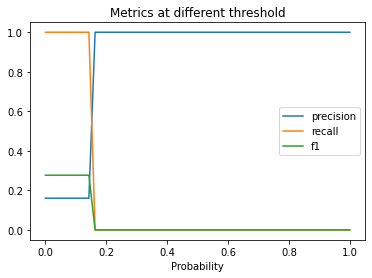

In [29]:
_,_,_ = threshhold_and_plot(y_test=y_test, target=test_pred[:,1],n_points=50, plot=True)

In [30]:
# null reg with model params, cross validation,
model_params = {"model__C": (np.logspace(start=-4,stop=4,num=30))}
#pipe line has just model object
model_pipeline = pipeline.Pipeline(steps=[("model",null_reg)])
# set up cross-validator:
# 80/20 train/calibration split in this data (test data still held out)
# 200 iterations
cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                          random_state=1337,
                                          n_splits=50))
# set up grid search
model_grid = (
  model_selection.GridSearchCV(estimator=model_pipeline,
                           param_grid=model_params,
                           refit=True, # refit using best estimates
                           scoring="roc_auc", # metric to optimize (can pick another)
                           cv=cross_validator,
                           n_jobs = -1))

In [31]:
%%time
# fit model on intercept (random guesses - baseline performance)
null_mod = model_grid.fit(X_train_null,y_train)

Wall time: 3.99 s


In [32]:
%%time
# CV score on null model
cv_roc_auc_scores = (
  model_selection.cross_val_score(null_mod,
                                  X_train_null,
                                  y_train,
                                  scoring="roc_auc",
                                  cv=cross_validator,
                                  n_jobs=-1))

Wall time: 1min 57s


In [33]:
cv_quantiles = np.quantile(a=cv_roc_auc_scores,q=[0.025,0.975])
print(f" 2.5%:{cv_quantiles[0]:.3f},97.5%:{cv_quantiles[1]:.3f}")

 2.5%:0.500,97.5%:0.500


<AxesSubplot:ylabel='Count'>

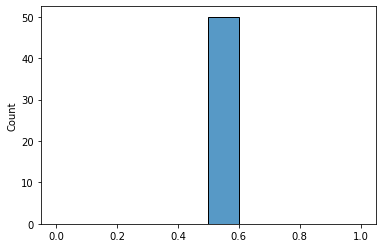

In [34]:
import seaborn as sns
sns.histplot(cv_roc_auc_scores, bins=10)

In [35]:
max_thresh(cv_roc_auc_scores)

(0, 0.5)

As expected the ROC_AUC score is 0.5 

In [36]:
#predict 
null_mod_test_preds = null_mod.predict_proba(X=X_test_null)

In [37]:
#base metrics precision: minimum performance on test data
metrics.precision_score(y_true= y_test,y_pred= np.where(null_mod_test_preds[:,1]>0.5,1,0),zero_division=1)

1.0

In [38]:
#base metrics recall: minmum performance
metrics.recall_score(y_true= y_test,y_pred= np.where(null_mod_test_preds[:,1]>0.5,1,0),zero_division=1)

0.0

In [39]:
#base metrics f1 score: minmum performance
metrics.f1_score(y_true= y_test,y_pred= np.where(null_mod_test_preds[:,1]>0.5,1,0),zero_division=1)

0.0

In [40]:
#check to see if close to population value
print("Observed: {:.3f}, Fit: {:.3f}".format(y_test.mean(),null_mod_test_preds.mean()))

Observed: 0.161, Fit: 0.500


In [41]:
????

Object `??` not found.


Max Test recall - 1.0 at index 0


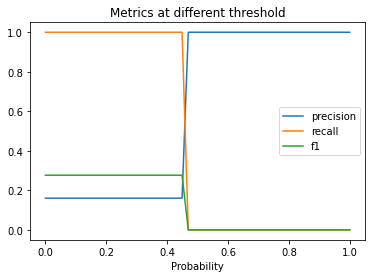

In [42]:
#test data
_,r,_ = threshhold_and_plot(y_test,null_mod_test_preds[:,1],plot=True)
max_recall_test_idx, max_recall_test_val = max_thresh(r)
print("Max Test recall - {} at index {}".format(max_recall_test_val,max_recall_test_idx))

In [43]:
null_mod_test_preds = null_mod.predict(X=X_test_null)

In [44]:
classifier_name= "Base Model"
threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=null_mod_test_preds, y_true= y_test,zero_division=1)
threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=null_mod_test_preds, y_true= y_test,zero_division=1)
threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=null_mod_test_preds, y_true= y_test,zero_division=1)
threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=null_mod_test_preds, y_true= y_test)   

In [45]:
threshhold_and_plot_score

,precision,recall,f1,accuracy
Base Model,1.0,0.0,0.0,0.839421
Logistic,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN
KNeighbors,NaN,NaN,NaN,NaN
XGBClassifier,NaN,NaN,NaN,NaN


### Model Selection 

Four competing supervised classfication models/algorithms are considered, namely, 
* Logistic Regression classification
* Random Forest classifier
* KNeighbours classification
* XGBoost classifier 

### Evaluation Metrics

Thinking of customer will not exit but he does, this means income loss for the Bank. Bank need to take the action steps for this scenario. This is false negative, and is "recall". Banks is looking for recall to be maximized, greater the recall lesser the chances of false negative means lesser chances of predicting customers will not exit where in reality they do. Since classes in the data are unbalanced, I can make use of confusion matrix to examine the outcome of model. Recall and precision metrics can be calculated from the confusion matrix, and this would help me assessing the models.

This project is aim to predict potential churn customers, and it is realised that the client cost of mistakenly classifying non-churn customer as churn may be high in practice because banks would not want to lose valuable customers, and the banks would like to identify churners at their best efforts as well. Thus, it would be useful to consider Recall. To complement this Receiver Operating Characteristic curve (ROC) is used. ROC is a plot of True Positive Rate (TPR) against False Positive Rate (FPR). This means I can consider TPR and FPR simultanesouly, by making use of the area under the curve (AUC) of ROC.

### Training and Modeling

In [46]:
# models listing and fitting
models = [
        linear_model.LogisticRegression(),
        ensemble.RandomForestClassifier(),
        neighbors.KNeighborsClassifier(),
        XGBClassifier(use_label_encoder=False)
        ]

for model in models :
            model.fit(X_train,y_train)

[16:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


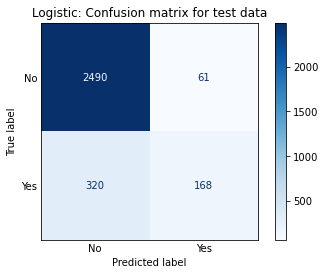

True -ve : 2490
False +ve : 61
False -ve : 320
True +ve : 168



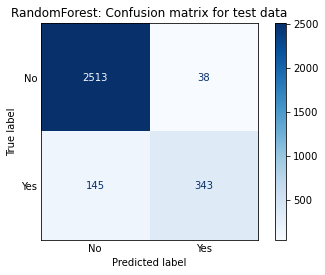

True -ve : 2513
False +ve : 38
False -ve : 145
True +ve : 343



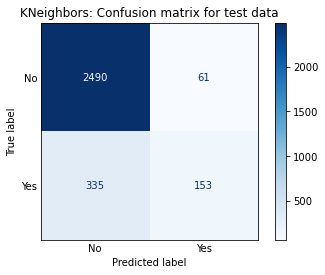

True -ve : 2490
False +ve : 61
False -ve : 335
True +ve : 153



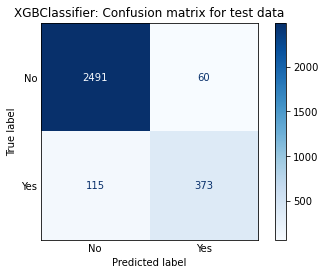

True -ve : 2491
False +ve : 60
False -ve : 115
True +ve : 373



In [47]:
#Model predition
model_names = [
        'Logistic' ,
        'RandomForest',
        'KNeighbors',
        'XGBClassifier'
]
  
for classifier,classifier_name in zip(models,model_names):
    y_pred_test=classifier.predict(X_test)
    threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=y_pred_test, y_true= y_test)
    threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=y_pred_test, y_true= y_test)
    title = classifier_name + ": Confusion matrix for test data" 
    make_confusion_matrix_ROC(y_test,y_pred_test,title,score=True,y_class_report=False,ROC_AUC=False)
   

As I can see XBG shows falls -ves less when compared to other models.Let me check recall scores.

In [48]:
# Precison and recall comparions
threshhold_and_plot_score

,precision,recall,f1,accuracy
Base Model,1.0,0.0,0.0,0.839421
Logistic,0.733624,0.344262,0.468619,0.87463
RandomForest,0.900262,0.702869,0.789413,0.939783
KNeighbors,0.714953,0.313525,0.435897,0.869694
XGBClassifier,0.861432,0.764344,0.809989,0.942415


Best Model is from XG Classifier with Score 76%

<AxesSubplot:>

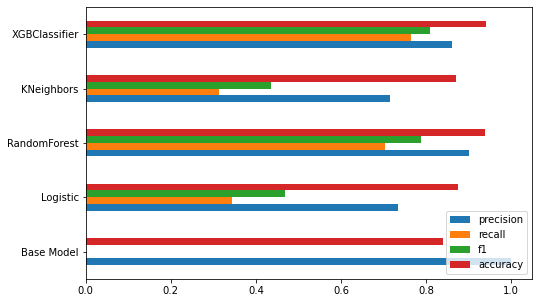

In [49]:
fig,ax=plt.subplots(figsize=(8,5))
threshhold_and_plot_score.plot(kind='barh',ax=ax)

Since I am looking for best recall score, XGB tops the list, followed with Random Forest. Now let me try adjusting the threshold for these models.

In [50]:
#precision, recall threshold from precision recall curve for RF and XGB classifires
for classifier,classifier_name in zip(models,model_names):
    proba_pred=classifier.predict_proba(X_test)[:,1]
    if classifier_name == 'RandomForest':
        precision_RF,recall_RF,Threshold_RF = metrics.precision_recall_curve(y_true = y_test,probas_pred=proba_pred)
        #precision_RF,recall_RF,Threshold_RF  = threshhold_and_plot(y_test=y_test, target=proba_pred,n_points=50, plot=False)
    if classifier_name == 'XGBClassifier':
        precision_XGB,recall_XGB,Threshold_XGB = metrics.precision_recall_curve(y_true = y_test,probas_pred=proba_pred)
        #precision_XGB,recall_XGB,Threshold_XGB  = threshhold_and_plot(y_test=y_test, target=proba_pred,n_points=50, plot=False)
    

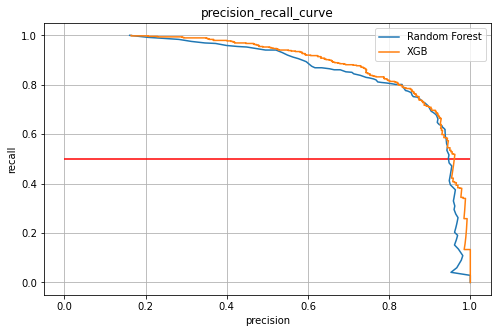

In [51]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(precision_RF,recall_RF,label = 'Random Forest')
ax.plot(precision_XGB,recall_XGB,label = 'XGB')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.set_title('precision_recall_curve')
ax.hlines(y=0.5,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

Random Forest and XGB look alike, with XGB slightly performaing better at recall 0.5. So let me get the threshold for XGB.

#### XGBoost Classification

XGBoost uses gradient boosting technique, and is on the priciples of decison tree ensemble, which a set of classification and regression trees. It is similar to Random Forest difference is how the algorithms train the models.

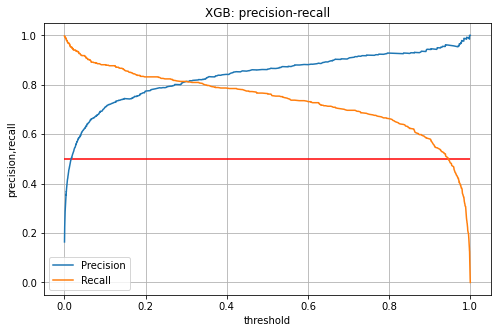

In [52]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(Threshold_XGB,precision_XGB[1:],label = 'Precision')
ax.plot(Threshold_XGB,recall_XGB[1:],label = 'Recall')
ax.set_xlabel('threshold')
ax.set_ylabel('precision,recall')
ax.set_title('XGB: precision-recall')
ax.hlines(y=0.5,xmin=0,xmax=1,color='red')
ax.legend()
ax.grid()

At threshold 0.2, I can see recall is little over 80% and precision is little below 80%

#### XGB with threshold 0.2

[16:32:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


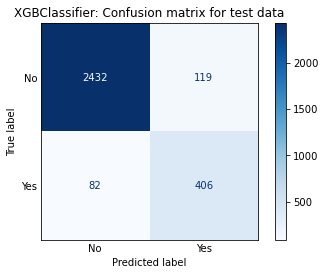

True -ve : 2432
False +ve : 119
False -ve : 82
True +ve : 406



In [53]:
xgb_mod = XGBClassifier(use_label_encoder=False)
xgb_mod.fit(X_train,y_train)
y_pred_proba=xgb_mod.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')
title = classifier_name + ": Confusion matrix for test data" 
make_confusion_matrix_ROC(y_test,y_pred_test,title,score=True,y_class_report=False,ROC_AUC=False)

After applying threshold False -ve are further reduced.Check the precison and recall score

In [54]:
#Precision and recall scores
precision_XGB = metrics.precision_score(y_true = y_test,y_pred=y_pred_test)
recall_XGB = metrics.recall_score(y_true = y_test,y_pred=y_pred_test)
print('precision: ',precision_XGB)
print('recall: ',recall_XGB)

precision:  0.7733333333333333
recall:  0.8319672131147541


### Feature Importance

Feature Importance is a process used to select features in the dataset that contributes the most in predicting the target variable. Working with selected features instead of all the features reduces the risk of over-fitting, improves accuracy, and decreases the training time. 

Finding Feature importance and selecting top 8 features

In [55]:
# converting numby to dataframe 
cols = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Gender_Encoded',
       'Dependent_count', 'Education_Level_sorted', 'Income_Category_sorted',
       'Card_Category_sorted', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Marital_Status_sorted_Married', 'Marital_Status_sorted_Single']
        
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

Many ways to find the feature importance, I am using builtin XBG function

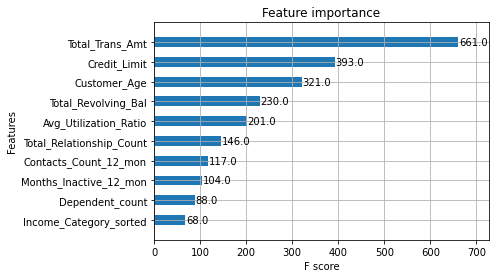

<Figure size 1440x1440 with 0 Axes>

In [56]:
#find top 8 feature using XGBoost

from xgboost import XGBRegressor,plot_importance
import matplotlib.pyplot as plt
#xgb = XGBRegressor(n_estimators=100)
xgb = XGBClassifier(booster="gbtree", verbosity=0, use_label_encoder=False,n_jobs=-1)
xgb.fit(X_train, y_train)

# from Builtin XGB
plot_importance(xgb, max_num_features = 10,height=0.5)
plt.figure(figsize=(20,20))
plt.show()

#sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
#for index in sorted_idx:
#   print([X_train.columns[index], xgb.feature_importances_[index]])

The top 8 features can influence prediction are as below. 

* Total_Trans_Amt: Total Transaction Amount in Last 12 months((one year))
* Credit_Limit: Credit Limit on the Credit Card
* Customer_Age: Age in Years
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
* Total_Relationship_Count: Total no. of products held by the customer
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months(one year)
* Months_Inactive_12_mon: No. of months inactive in the last 12 months(one year)

In [57]:
# creating train, test for these 8 features
'''cols = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Total_Relationship_Count',
        'Contacts_Count_12_mon','Months_Inactive_12_mon']
'''

# using only top 5 , patsy is crashing my PC
cols = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Avg_Utilization_Ratio']

X_train_f = pd.DataFrame(X_train,columns=cols)
X_test_f = pd.DataFrame(X_test,columns=cols)

### Feature interactions

For this purpose I am using python package called 'patsy'. And here is the intoduction and references.

Feature interaction using design Matrix. The design matrix contains data on the independent variables (also called explanatory variables) in statistical models which attempt to explain observed data on a response variable (often called a dependent variable) in terms of the explanatory variables. The theory relating to such models makes substantial use of matrix manipulations involving the design matrix: see for example linear regression. A notable feature of the concept of a design matrix is that it is able to represent a number of different experimental designs and statistical models, e.g., ANOVA, ANCOVA, and linear regression.[ ref: https://en.wikipedia.org/wiki/Design_matrix

<b>ref:</b>
* https://learn-scikit.oneoffcoder.com/patsy.html
* https://learn-scikit.oneoffcoder.com/xgboost.html
* https://readthedocs.org/projects/patsy/downloads/pdf/latest/
* https://www.programcreek.com/python/example/120751/patsy.dmatrix

patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S. For instance, if we have some variable y, and we want to regress it against some other variables x, a, b, and the interaction of a and b, then we simply write: patsy.dmatrices("y ~ x + a + b + a:b", data) and Patsy takes care of building appropriate matrices.
ref: https://patsy.readthedocs.io/en/latest/overview.html

Patsy is a neat API to transform your data into experimentation model form. For regression and classification problems, you often want your data in the Xy form where X is a matrix (independent variable) and y is a column vector (dependent variable).
ref: https://learn-scikit.oneoffcoder.com/patsy.html


In [58]:
from patsy import dmatrix
#formula = 'Customer_Age*Credit_Limit*Total_Revolving_Bal*Total_Trans_Amt*Avg_Utilization_Ratio*Total_Relationship_Count*Contacts_Count_12_mon*Months_Inactive_12_mon'
# only top 5 is used.
#create model formula
model_formula = 'Total_Trans_Amt*Credit_Limit*Customer_Age*Total_Revolving_Bal*Avg_Utilization_Ratio'
#Apply model formula to train and test
X_train = dmatrix(model_formula, X_train_f, return_type='dataframe')
X_test = dmatrix(model_formula, X_test_f, return_type='dataframe')

In [59]:
X_train.head(5)

,Intercept,Total_Trans_Amt,Credit_Limit,Total_Trans_Amt:Credit_Limit,Customer_Age,Total_Trans_Amt:Customer_Age,Credit_Limit:Customer_Age,Total_Trans_Amt:Credit_Limit:Customer_Age,Total_Revolving_Bal,Total_Trans_Amt:Total_Revolving_Bal,...,Credit_Limit:Customer_Age:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Customer_Age:Avg_Utilization_Ratio,Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Total_Revolving_Bal:Avg_Utilization_Ratio,Credit_Limit:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Total_Revolving_Bal:Avg_Utilization_Ratio,Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Credit_Limit:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio
0,1.0,8.978408,10.312845,92.592934,-0.536671,-4.818452,-5.534606,-49.691949,1.672427,15.015736,...,-0.392957,-3.528128,0.118742,1.066117,1.224571,10.994702,-0.063726,-0.572154,-0.657192,-5.900538
1,1.0,8.429454,8.285009,69.838104,-0.536671,-4.523844,-4.446325,-37.480090,0.956795,8.065259,...,-1.365022,-11.506388,0.293736,2.476035,2.433606,20.513969,-0.157640,-1.328816,-1.306046,-11.009254
2,1.0,8.484877,7.555905,64.110922,-0.038008,-0.322495,-0.287187,-2.436745,0.920660,7.811685,...,-0.176046,-1.493725,0.564364,4.788563,4.264285,36.181928,-0.021451,-0.182005,-0.162078,-1.375212
3,1.0,8.465057,9.568294,80.996162,-1.284665,-10.874765,-12.292056,-104.052957,0.549097,4.648134,...,-0.602311,-5.098595,0.026906,0.227759,0.257442,2.179261,-0.034565,-0.292594,-0.330727,-2.799621
4,1.0,7.494430,8.352554,62.597636,1.582646,11.861029,13.219135,99.069888,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
X_test.head(5)

,Intercept,Total_Trans_Amt,Credit_Limit,Total_Trans_Amt:Credit_Limit,Customer_Age,Total_Trans_Amt:Customer_Age,Credit_Limit:Customer_Age,Total_Trans_Amt:Credit_Limit:Customer_Age,Total_Revolving_Bal,Total_Trans_Amt:Total_Revolving_Bal,...,Credit_Limit:Customer_Age:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Customer_Age:Avg_Utilization_Ratio,Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Total_Revolving_Bal:Avg_Utilization_Ratio,Credit_Limit:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Total_Revolving_Bal:Avg_Utilization_Ratio,Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Credit_Limit:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio,Total_Trans_Amt:Credit_Limit:Customer_Age:Total_Revolving_Bal:Avg_Utilization_Ratio
0,1.0,9.607841,8.187021,78.659593,0.202997,1.950360,1.661938,15.967638,1.555729,14.947194,...,0.922376,8.862039,0.863429,8.295693,7.068915,67.917010,0.175273,1.683998,1.434966,13.786929
1,1.0,9.231221,8.697513,80.288661,-2.170683,-20.038058,-18.879547,-174.281265,0.514419,4.748718,...,-2.076750,-19.170939,0.056586,0.522359,0.492159,4.543224,-0.122831,-1.133876,-1.068320,-9.861902
2,1.0,7.841886,8.146130,63.881018,-2.045753,-16.042561,-16.664968,-130.684777,1.961808,15.384277,...,-12.165427,-95.399888,1.432120,11.230522,11.666235,91.485286,-2.929764,-22.974873,-23.866234,-187.156288
3,1.0,7.192934,9.830056,70.706948,0.327927,2.358759,3.223543,23.186734,1.961808,14.111158,...,0.435178,3.130209,0.264844,1.905006,2.603433,18.726319,0.086850,0.624703,0.853736,6.140870
4,1.0,7.672292,7.385231,56.661651,-2.545475,-19.529629,-18.798921,-144.230818,0.650818,4.993269,...,-9.737841,-74.711564,0.337124,2.586513,2.489738,19.101999,-0.858141,-6.583905,-6.337566,-48.623660


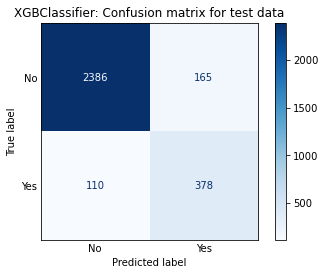

True -ve : 2386
False +ve : 165
False -ve : 110
True +ve : 378



In [61]:
# models fitting and predicting
xgb_mod = XGBClassifier(use_label_encoder=False)
xgb_mod.fit(X_train,y_train)
y_pred_proba=xgb_mod.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')
title = classifier_name + ": Confusion matrix for test data" 
make_confusion_matrix_ROC(y_test,y_pred_test,title,score=True,y_class_report=False,ROC_AUC=False)

In [62]:
#Precision and recall scores
precision_XGB = metrics.precision_score(y_true = y_test,y_pred=y_pred_test)
recall_XGB = metrics.recall_score(y_true = y_test,y_pred=y_pred_test)
print('precision: ',precision_XGB)
print('recall: ',recall_XGB)

precision:  0.6961325966850829
recall:  0.7745901639344263


In [63]:
classifier_name = 'XGB with top 5 featue and Dmatrix'
threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=y_pred_test, y_true= y_test)

In [64]:
threshhold_and_plot_score

,precision,recall,f1,accuracy
Base Model,1.0,0.0,0.0,0.839421
Logistic,0.733624,0.344262,0.468619,0.87463
RandomForest,0.900262,0.702869,0.789413,0.939783
KNeighbors,0.714953,0.313525,0.435897,0.869694
XGBClassifier,0.861432,0.764344,0.809989,0.942415
XGB with top 5 featue and Dmatrix,0.696133,0.77459,0.733269,0.90951


With top 5 features recall scored slightly improved. however False -ves are slightly goneup. ??? 

### Hyperparameter Tuning and Model Training

Each model is subject to various hyperparameters that need to be determined. Here random search and grid search methods are used optimise the hyperparameters for our chosen models. Grid search exhaustively checks every combinations of hyperparameters given in the parameter domain to optimise the given score, "roc_auc" in this project. Random search checks random combinations of hyperparameters for a given number of iterations to optimise the given score. The advantage of random search is shorter time but the trade-off is that it might miss the best possible combination.

Below are the two functions, rand_search(), and grid_search(), to help in implementation. No scaling is done as it is each feature is already scaled, so then train the models with training dataset.


In [65]:
# rand search function
def rand_search(X_train,y_train,parameters,model,n_iter=100):
    scoring = 'roc_auc'
    verbose = 1
    clf_pipeline = Pipeline([("clf",model)])   
    clf_rand = model_selection.RandomizedSearchCV(clf_pipeline, parameters, n_iter = n_iter,scoring=scoring,verbose = verbose, random_state=1,n_jobs=-1)
    clf_rand.fit(X_train,y_train)  #learn the training set
    
    print("Best parameters for ", model) 
    print(clf_rand.best_params_)
    print(f"\nBest train %s score: {clf_rand.best_score_ :.2f}" % (scoring))
    return clf_rand.best_estimator_

The hyperparameters we need to fine-tune are as follows:

      learning_rate: the learning rate of gradient boosting
      max_depth:maximum tree depth
      min_child_weight: minimum sum of instance weight(hessian) needed in a child. Useful to reduce overfitting
      reg_lambda: L2 regularisation


In [66]:
#Settingranges for the hyperparameter are shown below.
xgb_params = {"clf__learning_rate": [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
               "clf__max_depth": np.arange(2,7),
               "clf__min_child_weight": np.arange(1,11),
               "clf__reg_lambda": np.linspace(0.1,1,num=10)
              }

In [67]:
%%time
classifier = XGBClassifier(booster="gbtree", verbosity=0, use_label_encoder=False,n_jobs=-1)
xgb_best_estimator = rand_search(X_train,y_train, xgb_params,classifier,n_iter=120)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters for  XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=0)
{'clf__reg_lambda': 0.4, 'clf__min_child_weight': 2, 'clf__max_depth': 5, 'clf__learning_rate': 0.1}

Best train roc_auc score: 0.95
Wall time: 4min 38s


### Evaluation 

Now run the model using the best estimators on the test set, and print out the confusion matrix and evaluation metrics.

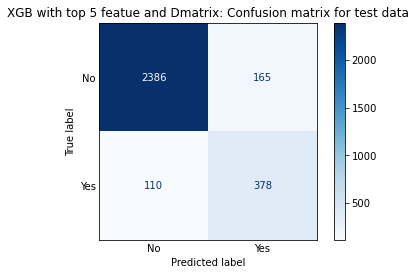

True -ve : 2386
False +ve : 165
False -ve : 110
True +ve : 378



In [68]:
y_pred = xgb_best_estimator.predict(X_test)
y_proba = xgb_best_estimator.predict_proba(X_test)
y_pred_test = (y_pred_proba >=0.2).astype('int')
title = classifier_name + ": Confusion matrix for test data" 
make_confusion_matrix_ROC(y_test,y_pred_test,title,score=True,y_class_report=False,ROC_AUC=False)

In [69]:
#Precision and recall scores
classifier_name = 'XGB after hyper param tuning'
threshhold_and_plot_score.loc[classifier_name,'precision'] = metrics.precision_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'recall'] = metrics.recall_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'f1'] = metrics.f1_score(y_pred=y_pred_test, y_true= y_test)
threshhold_and_plot_score.loc[classifier_name,'accuracy'] = metrics.accuracy_score(y_pred=y_pred_test, y_true= y_test)

In [70]:
threshhold_and_plot_score

,precision,recall,f1,accuracy
Base Model,1.0,0.0,0.0,0.839421
Logistic,0.733624,0.344262,0.468619,0.87463
RandomForest,0.900262,0.702869,0.789413,0.939783
KNeighbors,0.714953,0.313525,0.435897,0.869694
XGBClassifier,0.861432,0.764344,0.809989,0.942415
XGB with top 5 featue and Dmatrix,0.696133,0.77459,0.733269,0.90951
XGB after hyper param tuning,0.696133,0.77459,0.733269,0.90951


Hyper param tuning did not influence the score.

### ROC Curve 

Best Threshold is 0.1192


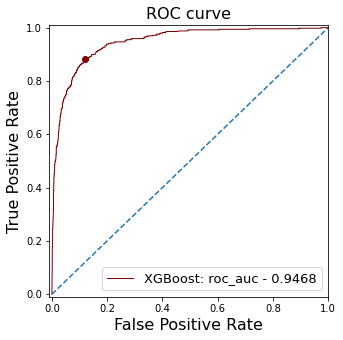

In [71]:
y_proba_xgb = xgb_best_estimator.predict_proba(X_test)

fpr_xgb, tpr_xgb, xgb_thresholds = metrics.roc_curve(y_test, y_proba_xgb[:,1])

# null ROC AUC
plt.figure(figsize=(5,5))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot([0,1], [0,1], linestyle='--')

# Calculate bestthreshold from ROC AUC
xgb_thresholds=np.float64(xgb_thresholds)
idx = np.argmax(tpr_xgb - fpr_xgb)
max_threshold = round(xgb_thresholds[idx],4)
roc_auc = round(metrics.auc(fpr_xgb, tpr_xgb),4)
print('Best Threshold is',max_threshold)

#idx,roc_auc = calc_threshold(tpr_xgb,fpr_xgb,xgb_thresholds,'XGBoost')
plt.plot(fpr_xgb, tpr_xgb, lw=1, label=('XGBoost: roc_auc - {0}'.format(roc_auc)), color='maroon')
plt.scatter(fpr_xgb[idx], tpr_xgb[idx], marker='o', color='maroon')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)

plt.show();

XGBoost is performed well with AUC 95%. At production this model can be deployed to predict potential churner.

Random Forest is the nest classifier on these kind of data set. This means, ensemble and boosting algo work on these type of dataset.

### At production

* Total_Trans_Amt: Total Transaction Amount in Last 12 months((one year))
* Credit_Limit: Credit Limit on the Credit Card
* Customer_Age: Age in Years
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [74]:
new_cust = [[35,8000,850,1500,0.5]]
X_data = pd.DataFrame(new_cust, columns=['Customer_Age',
                                        'Credit_Limit' ,
                                        'Total_Revolving_Bal',
                                        'Total_Trans_Amt',
                                        'Avg_Utilization_Ratio'])
# apply scaling
X_data = dmatrix(model_formula, X_data, return_type='dataframe')
#make prediction
y_proba = xgb_best_estimator.predict_proba(X_data)[0][1]

if y_proba > 0.2:
    print("Churn")
else:
    print ("Stay")


Stay


## Additional Models: <a id=AdditionalModels></a>

We have selected four of the many machine learning models available. It would be interesting to see the results of other models. Feature importance: With the knowledge of the feature importance, we can run the model on a dataset containing only the important features with the respective thresholds and compare the results.

Along with neural networks, other popular prediction techniques can be applied in combination, such as support vector machine develop hybrid model.


## Summary <a id =Summary> </a>

XGbooost performed best with grid search along with Random Forest among the four models interms of recall.

The top 3 most important feature from  all 4 selected models are:

    Total_Revolving_Bal (Total revolving balance on the credit card)
    Total_Trans_Amt (Total transaction count in the last 12 months)
    Total_Relationship_Count (Total number of products held by the customer)

It can be concluded above 3 features are the most important common predictor of churners based on these findings.


## Recommendations <a id = Recom></a>

Lower transcation count on credit card , less revolving balance , less transcational amount are an indication that customer will attrite.
Lower transcation indicate customer is not using this credit card , Bank may need to consider Cash back, or rewards or some other offers to customer to use the credit card more.

  From the EDA 
* Customers who have had high number of contacts with the bank in the last 12 months have attrited. This needs to be investigated whether there were any issues of customers that were not resolved made customer leaving the bank.
* The proportion of income category of attrited customer, it is highly concentrated around 60K - 80K income, followed by Less than 40K income  compare to attrited customers with higher annual income of 80K-120K and over 120K+.
* Customers who are inactive for a month show high chances of attrition.Bank should focus on these customers as well.
* Customer in age range 36-55 ,who were doctorate or postgraduate  and/or Female attrited more.Reasons need to be further investigated.
* customer having more product with the bank he/she is less likely to attrite.This may be indication for Bank to offer different service to customer.
* Avg utilization ratio is lower amongst attrited customers.